# Text algorithms
## Pattern matching
### Author: Przemysław Węglik

### Naive Algorithm

In [1]:
from collections import defaultdict
from typing import List, Dict, Tuple
from time import time
import matplotlib.pyplot as plt
import csv
import random

In [2]:
Offsets = List[int]

def compare_strings(str1, str2):
    if len(str1) != len(str2):
        return False
    
    for i in range(len(str1)):
        if str1[i] != str2[i]:
            return False
        
    return True

def naive_algorithm(text: str, pattern: str) -> Offsets:
    n: int = len(text)
    m: int = len(pattern)
    
    offsets: Offsets = []
    
    # go through text letter by letter
    # +1 coz weird python syntax
    for i in range(n - m + 1):
        if compare_strings(text[i:(i + m)], pattern):
            offsets.append(i)
            
    return offsets

In [3]:
naive_offsets: Offsets = []

with open("legal_paper", "r") as file:
    text: str = file.read()
    pattern: str = "art"
        
    naive_offsets = naive_algorithm(text, pattern)
    
len(naive_offsets), naive_offsets

(273,
 [1156,
  1505,
  4692,
  4734,
  4879,
  5082,
  5148,
  5949,
  6039,
  7266,
  7511,
  7781,
  8044,
  8299,
  9104,
  9959,
  10022,
  10224,
  11122,
  11207,
  11618,
  13194,
  15284,
  15358,
  16092,
  16261,
  16406,
  16547,
  16616,
  16840,
  16856,
  23637,
  24061,
  24152,
  24586,
  24683,
  24780,
  24931,
  25530,
  25689,
  27001,
  27288,
  27479,
  27542,
  27592,
  27857,
  28373,
  28558,
  28766,
  30964,
  31021,
  31096,
  31362,
  31811,
  32609,
  32968,
  33053,
  33268,
  33595,
  34651,
  34737,
  35511,
  36155,
  37143,
  37543,
  38451,
  38595,
  39056,
  39210,
  39436,
  39568,
  39980,
  41152,
  41829,
  42028,
  42198,
  42371,
  42504,
  42718,
  42896,
  42941,
  43447,
  43555,
  43787,
  44590,
  44653,
  44953,
  45010,
  45293,
  45401,
  47319,
  47422,
  48785,
  48820,
  48906,
  49052,
  49259,
  49316,
  49488,
  49559,
  49915,
  49979,
  50102,
  50160,
  50702,
  51050,
  51179,
  51966,
  52071,
  52272,
  52552,
  53008,
  

### Finite state machine algorithm

In [4]:
Character = str
TransitionMatrix = Dict[int, Dict[str, int]]

def generate_transition_matrix(pattern: str) -> TransitionMatrix:
    m = len(pattern)
    transition_matrix = {i: defaultdict(int) for i in range(m + 1)}
    
    pattern_alphabet = set(pattern)
    
    for q in range(m + 1):
        for a in pattern_alphabet:
            # P_q.a - argument of suffix function
            prefix_with_letter = pattern[:q] + a
            prefix_length = q + 1

            # k goes from 1 to length of prefix
            for k in range(1, prefix_length + 1, 1):
                if compare_strings(pattern[:k], prefix_with_letter[-k:]):
                    transition_matrix[q][a] = k
                    
    return transition_matrix
    
    
def finite_automata_algorithm(text: str, pattern: str, trans_mat = None) -> Offsets:
    
    m = len(pattern)
    state: int = 0
    offsets: Offsets = []

    if trans_mat == None:
        trans_mat: TransitionMatrix = generate_transition_matrix(pattern)
        
    for index, letter in enumerate(text):
        state = trans_mat[state][letter]
        if state == m:
            offsets.append(index + 1 - m)
        
    return offsets      
    
    
    

In [5]:
fa_offsets: Offsets = []

with open("legal_paper", "r") as file:
    text: str = file.read()
    pattern: str = "art"
        
    fa_offsets = finite_automata_algorithm(text, pattern)
    
len(fa_offsets), fa_offsets

(273,
 [1156,
  1505,
  4692,
  4734,
  4879,
  5082,
  5148,
  5949,
  6039,
  7266,
  7511,
  7781,
  8044,
  8299,
  9104,
  9959,
  10022,
  10224,
  11122,
  11207,
  11618,
  13194,
  15284,
  15358,
  16092,
  16261,
  16406,
  16547,
  16616,
  16840,
  16856,
  23637,
  24061,
  24152,
  24586,
  24683,
  24780,
  24931,
  25530,
  25689,
  27001,
  27288,
  27479,
  27542,
  27592,
  27857,
  28373,
  28558,
  28766,
  30964,
  31021,
  31096,
  31362,
  31811,
  32609,
  32968,
  33053,
  33268,
  33595,
  34651,
  34737,
  35511,
  36155,
  37143,
  37543,
  38451,
  38595,
  39056,
  39210,
  39436,
  39568,
  39980,
  41152,
  41829,
  42028,
  42198,
  42371,
  42504,
  42718,
  42896,
  42941,
  43447,
  43555,
  43787,
  44590,
  44653,
  44953,
  45010,
  45293,
  45401,
  47319,
  47422,
  48785,
  48820,
  48906,
  49052,
  49259,
  49316,
  49488,
  49559,
  49915,
  49979,
  50102,
  50160,
  50702,
  51050,
  51179,
  51966,
  52071,
  52272,
  52552,
  53008,
  

### Kunth-Morris-Pratt Algorithm

In [6]:
def prefix_function(pattern: str, q: int) -> int:
    for k in range(q - 1, -1, -1):
        if pattern[:k] == pattern[:q][-k:]:
            return k
    return 0
        

def kmp_algorithm(text: str, pattern: str, prefix_array = None) -> Offsets:

    m: int = len(pattern)
    
    if prefix_array == None:
        prefix_array: List[int] = [prefix_function(pattern, q) for q in range(1, m + 1)]
    
    offsets: Offsets = []

    j: int = 0
    for i in range(len(text)):
        while j > 0  and text[i] != pattern[j]:
            j = prefix_array[j - 1];
                
        if compare_strings(text[i], pattern[j]):
            j += 1
            
        if j == m:
            offsets.append(i - j + 1)
            j = prefix_array[j - 1]
            
            
    return offsets
            
            
        

In [7]:
kmp_offsets: Offsets = []

with open("legal_paper", "r") as file:
    text: str = file.read()
    pattern: str = "art"
        
    kmp_offsets = kmp_algorithm(text, pattern)
    
len(kmp_offsets), kmp_offsets

(273,
 [1156,
  1505,
  4692,
  4734,
  4879,
  5082,
  5148,
  5949,
  6039,
  7266,
  7511,
  7781,
  8044,
  8299,
  9104,
  9959,
  10022,
  10224,
  11122,
  11207,
  11618,
  13194,
  15284,
  15358,
  16092,
  16261,
  16406,
  16547,
  16616,
  16840,
  16856,
  23637,
  24061,
  24152,
  24586,
  24683,
  24780,
  24931,
  25530,
  25689,
  27001,
  27288,
  27479,
  27542,
  27592,
  27857,
  28373,
  28558,
  28766,
  30964,
  31021,
  31096,
  31362,
  31811,
  32609,
  32968,
  33053,
  33268,
  33595,
  34651,
  34737,
  35511,
  36155,
  37143,
  37543,
  38451,
  38595,
  39056,
  39210,
  39436,
  39568,
  39980,
  41152,
  41829,
  42028,
  42198,
  42371,
  42504,
  42718,
  42896,
  42941,
  43447,
  43555,
  43787,
  44590,
  44653,
  44953,
  45010,
  45293,
  45401,
  47319,
  47422,
  48785,
  48820,
  48906,
  49052,
  49259,
  49316,
  49488,
  49559,
  49915,
  49979,
  50102,
  50160,
  50702,
  51050,
  51179,
  51966,
  52071,
  52272,
  52552,
  53008,
  

In [8]:
# proof of work - but not in a blockchain context
naive_offsets == fa_offsets, naive_offsets == kmp_offsets

(True, True)

### Time benchamark function

In [9]:
def time_benchmark_algorithms(
            text: str, 
            pattern: str, 
            N: int
            ) -> Tuple[float, float, float]:
    naive_time: float = 0
    fa_time: float = 0
    kmp_time: float = 0
    
    # Time naive
    start = time()
    for i in range(N):
        naive_algorithm(text, pattern)
    end = time()
    naive_time = end - start
    
    # Time FA
    start = time()
    for i in range(N):
        finite_automata_algorithm(text, pattern)
    end = time()
    fa_time = end - start
    
    # Time KMP
    start = time()
    for i in range(N):
        kmp_algorithm(text, pattern)
    end = time()
    kmp_time = end - start
    
    return naive_time, fa_time, kmp_time
    

def time_benchmark_algorithms_no_pre(
            text: str, 
            pattern: str, 
            N: int
            ) -> Tuple[float, float, float]:
    
    trans_matrix = generate_transition_matrix(pattern)
    prefix_array = [prefix_function(pattern, q) for q in range(1, len(pattern) + 1)]
        
    naive_time: float = 0
    fa_time: float = 0
    kmp_time: float = 0
    
    start = time()
    for i in range(N):
        naive_algorithm(text, pattern)
    end = time()
    naive_time = end - start
    
    start = time()
    for i in range(N):
        finite_automata_algorithm(text, pattern, trans_matrix)
    end = time()
    fa_time = end - start
    
    start = time()
    for i in range(N):
        kmp_algorithm(text, pattern, prefix_array)
    end = time()
    kmp_time = end - start
    
    return naive_time, fa_time, kmp_time

### Time benchmark for law paper

**Benchmark considering preprocessing time**

In [10]:
naive_times: List[float] = []
fa_times: List[float] = []
kmp_times: List[float] = []

with open("legal_paper", "r") as file:
    text: str = file.read()
    pattern: str = "art"
    RATIO = 0.1
    for i in range(1, 11, 1):
        benchmarks = time_benchmark_algorithms(text[: int(len(text) * RATIO * i)], pattern, 5)

        naive_times.append(benchmarks[0])
        fa_times.append(benchmarks[1])
        kmp_times.append(benchmarks[2])
        print(f'{i}', end = " ")

1 2 3 4 5 6 7 8 9 10 

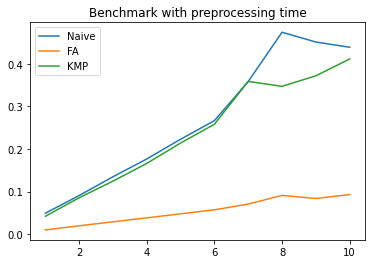

In [11]:
X = [N for N in range(1, 11, 1)]

plt.plot(X, naive_times, label = 'Naive')
plt.plot(X, fa_times, label = 'FA')
plt.plot(X, kmp_times, label = 'KMP')
plt.title('Benchmark with preprocessing time')
plt.legend()
plt.show()

**Benchamrks without preprocessing time**

In [12]:
naive_times_no_pre: List[float] = []
fa_times_no_pre: List[float] = []
kmp_times_no_pre: List[float] = []

with open("legal_paper", "r") as file:
    text: str = file.read()
    pattern: str = "art"
    
    for i in range(1, 11, 1):
        benchmarks = time_benchmark_algorithms_no_pre(text[: int(len(text) * RATIO * i)], pattern, 5)

        naive_times_no_pre.append(benchmarks[0])
        fa_times_no_pre.append(benchmarks[1])
        kmp_times_no_pre.append(benchmarks[2])
        print(f'{i}', end = " ")

1 2 3 4 5 6 7 8 9 10 

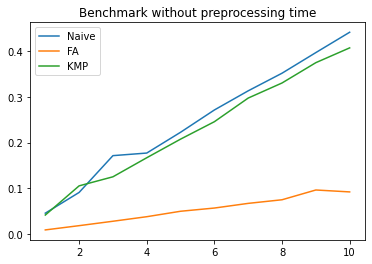

In [13]:
plt.plot(X, naive_times_no_pre, label = 'Naive')
plt.plot(X, fa_times_no_pre, label = 'FA')
plt.plot(X, kmp_times_no_pre, label = 'KMP')
plt.title('Benchmark without preprocessing time')
plt.legend()
plt.show()

### Wnioski
Wszystkie trzy algorytmy mają złożoność liniową różniącą się jedynie nieco współczynnikiem. Współczynnik ten zależy głównie od danych wejściowych. W przypadku tesktu zawierającego znaki z całego alfabetu, a także tak krótkiego wzorca (i zawierającego mało powtórzonych wzorów) jak 'art' algortymy FA i KMP nie pokazały swoich mocnych stron. 
### UWAGA
Wnioski są słuszne jedynie podczas używania funkcji **compare_strings()** używanej do porównywania stringów znak po znaku. Zwyczajne Pythonowe porównanie okazało się na tyle szybkie, że algorytmy były nierozróżnialne czasowo.

Ponieważ w algortymie FA nie wykorzystujemy porównywania całych strigów to jego współczynnik przy złożoności obliczeniowej jest dużo mniejszy.

### Benchmark for wikipedia lookig for 'Ukraina'

In [14]:
naive_time_ukraina: float = 0
fa_time_ukraina: float = 0
kmp_time_ukraina: float = 0

with open("passages-head.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t")
    
    text: str = ""
    pattern: str = "Ukraina"
        
    for row in tsv_file:
        text += row[3]

    naive_time_ukraina = benchmarks[0]
    fa_time_ukraina = benchmarks[1]
    kmp_time_ukraina = benchmarks[2]
       

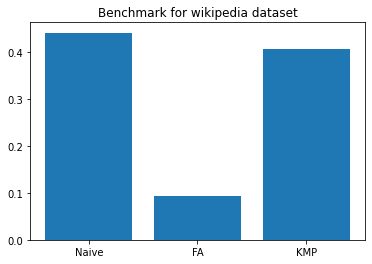

In [15]:
plt.bar(['Naive', 'FA', 'KMP'], [naive_time_ukraina, fa_time_ukraina, kmp_time_ukraina])
plt.title('Benchmark for wikipedia dataset')
plt.show()

### Wnioski
Bardzo podobny przypadek co do poprzedniego tekstu. Tekst zawiera zdania z języka naturalnego, a więc nie zawiera wielu powtarzajacyh się tych samych liter pod rząd itp. co za tym idzie, FA i KMP nie optymalizują czasu wyszukiwania wzorca zbyt dobrze

### Benchmark for effective FA and KMP

In [16]:
naive_times_effective: List[float] = []
fa_times_effective: List[float] = []
kmp_times_effective: List[float] = []


text = 'x' * 3000
pattern = 'x' * 200


for i in range(1, 11, 1):
    benchmarks = time_benchmark_algorithms_no_pre(text[: int(len(text) * RATIO * i)], pattern, 3)

    naive_times_effective.append(benchmarks[0])
    fa_times_effective.append(benchmarks[1])
    kmp_times_effective.append(benchmarks[2])
    print(f'{i}', end = " ")

1 2 3 4 5 6 7 8 9 10 

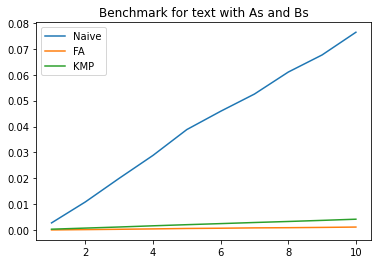

In [17]:
plt.plot(X, naive_times_effective, label = 'Naive')
plt.plot(X, fa_times_effective, label = 'FA')
plt.plot(X, kmp_times_effective, label = 'KMP')
plt.title('Benchmark for text with As and Bs')
plt.legend()
plt.show()

**Wnioski:** Tutaj w końcu widać różnice miedzy algorytmami. Ponieważ wzorzec jest długi i składa się z tej samej litery, algorytmy FA i KMP wykonują zdecydowanie mniej porównań.

### Benchmark for effective prefix function but no transposition matrix

In [18]:
N = 10
patter = "abcdefghijklmnopqrstuvwxyz"

start = time()
for i in range(N):
    generate_transition_matrix(pattern)
end = time()
trans_mat_time = end - start

start = time()
for i in range(N):
    [prefix_function(pattern, q) for q in range(1, len(pattern) + 1)]
end = time()
prefix_fun_time = end - start

trans_mat_time, prefix_fun_time

(0.7015891075134277, 0.0009067058563232422)

**Wnioski:** Jeśli we wzorcu występuję wiele różnych liter, to wyliczanie funkcji prefixowej jest o kilka rzędów wielkości szybsze